In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-prediction-in-united-states/heart_attack_dataset.csv


# **Import**
------------

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import & EDA**
----------------

In [38]:
df = pd.read_csv('/kaggle/input/heart-attack-prediction-in-united-states/heart_attack_dataset.csv')

## **Data Description**
* https://www.kaggle.com/datasets/ankushpanday2/heart-attack-prediction-in-united-states/data

## **Summary**

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372974 entries, 0 to 372973
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Age                    372974 non-null  int64  
 1   Gender                 372974 non-null  object 
 2   Cholesterol            372974 non-null  int64  
 3   BloodPressure          372974 non-null  int64  
 4   HeartRate              372974 non-null  int64  
 5   BMI                    372974 non-null  float64
 6   Smoker                 372974 non-null  int64  
 7   Diabetes               372974 non-null  int64  
 8   Hypertension           372974 non-null  int64  
 9   FamilyHistory          372974 non-null  int64  
 10  PhysicalActivity       372974 non-null  int64  
 11  AlcoholConsumption     372974 non-null  int64  
 12  Diet                   372974 non-null  object 
 13  StressLevel            372974 non-null  int64  
 14  Ethnicity              372974 non-nu

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,372974.0,56.975151,15.867016,30.0,43.00,57.0,71.00,84.0
Cholesterol,372974.0,199.455844,57.723381,100.0,149.00,199.0,249.00,299.0
BloodPressure,372974.0,134.508234,25.984528,90.0,112.00,134.0,157.00,179.0
HeartRate,372974.0,89.495043,17.342658,60.0,74.00,89.0,105.00,119.0
BMI,372974.0,29.006733,6.345460,18.0,23.50,29.0,34.50,40.0
Smoker,372974.0,0.499225,0.500000,0.0,0.00,0.0,1.00,1.0
Diabetes,372974.0,0.500987,0.500000,0.0,0.00,1.0,1.00,1.0
Hypertension,372974.0,0.500973,0.500000,0.0,0.00,1.0,1.00,1.0
FamilyHistory,372974.0,0.499901,0.500001,0.0,0.00,0.0,1.00,1.0
PhysicalActivity,372974.0,3.003475,2.000114,0.0,1.00,3.0,5.00,6.0


## **Missing Value & Duplicate Value Check**

In [41]:
pd.DataFrame(df.isna().sum().reset_index(name='Na'))

,index,Na
0,Age,0
1,Gender,0
2,Cholesterol,0
3,BloodPressure,0
4,HeartRate,0
5,BMI,0
6,Smoker,0
7,Diabetes,0
8,Hypertension,0
9,FamilyHistory,0


In [42]:
df.duplicated().sum()

0

In [43]:
df.head()

,Age,Gender,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,...,ExerciseInducedAngina,Slope,NumberOfMajorVessels,Thalassemia,PreviousHeartAttack,StrokeHistory,Residence,EmploymentStatus,MaritalStatus,Outcome
0,31,Male,194,162,71,22.9,0,1,0,0,...,Yes,Downsloping,1,Normal,0,0,Suburban,Retired,Single,No Heart Attack
1,69,Male,208,148,93,33.9,1,1,0,0,...,Yes,Upsloping,2,Normal,0,0,Suburban,Unemployed,Married,No Heart Attack
2,34,Female,132,161,94,34.0,0,0,1,1,...,Yes,Upsloping,0,Normal,1,0,Rural,Retired,Single,Heart Attack
3,53,Male,268,134,91,35.0,0,1,1,0,...,Yes,Flat,0,Reversible defect,1,0,Suburban,Retired,Widowed,No Heart Attack
4,57,Female,203,140,75,30.1,0,1,0,0,...,Yes,Flat,0,Fixed defect,1,0,Rural,Retired,Married,Heart Attack


In [44]:
df.tail()

,Age,Gender,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,...,ExerciseInducedAngina,Slope,NumberOfMajorVessels,Thalassemia,PreviousHeartAttack,StrokeHistory,Residence,EmploymentStatus,MaritalStatus,Outcome
372969,49,Female,285,131,79,27.6,0,1,1,1,...,Yes,Flat,2,Fixed defect,1,0,Urban,Employed,Married,No Heart Attack
372970,77,Male,197,159,64,33.5,0,1,0,1,...,No,Downsloping,3,Fixed defect,0,1,Urban,Employed,Married,Heart Attack
372971,53,Female,243,94,84,34.7,1,1,1,0,...,Yes,Flat,3,Reversible defect,1,1,Urban,Retired,Married,Heart Attack
372972,78,Female,291,93,78,29.3,1,1,0,1,...,Yes,Upsloping,1,Fixed defect,0,0,Urban,Employed,Married,No Heart Attack
372973,71,Male,127,153,83,39.7,1,1,1,0,...,No,Upsloping,3,Fixed defect,1,1,Urban,Unemployed,Single,Heart Attack


# **2. Data Transfromation**

In [45]:
Feature = ['Smoker','Diabetes', 'Hypertension', 'FamilyHistory','PreviousHeartAttack','StrokeHistory']

In [46]:
def feature_trans(df):
    for i in Feature :
        df[i] = df[i].astype(object)

    return df

In [47]:
df = feature_trans(df)

# **3. Data Visuailization**

In [48]:
num_cols = df.select_dtypes(include = ['int64','float64']).columns
cat_cols = df.select_dtypes(exclude = ['int64','float64']).columns

In [49]:
print(num_cols,'\n')
print('length = ',len(num_cols))

Index(['Age', 'Cholesterol', 'BloodPressure', 'HeartRate', 'BMI',
       'PhysicalActivity', 'AlcoholConsumption', 'StressLevel', 'Income',
       'MaxHeartRate', 'ST_Depression', 'NumberOfMajorVessels'],
      dtype='object') 

length =  12


In [50]:
print(cat_cols,'\n')
print('length = ',len(cat_cols))

Index(['Gender', 'Smoker', 'Diabetes', 'Hypertension', 'FamilyHistory', 'Diet',
       'Ethnicity', 'EducationLevel', 'Medication', 'ChestPainType',
       'ECGResults', 'ExerciseInducedAngina', 'Slope', 'Thalassemia',
       'PreviousHeartAttack', 'StrokeHistory', 'Residence', 'EmploymentStatus',
       'MaritalStatus', 'Outcome'],
      dtype='object') 

length =  20


## **Histogram**

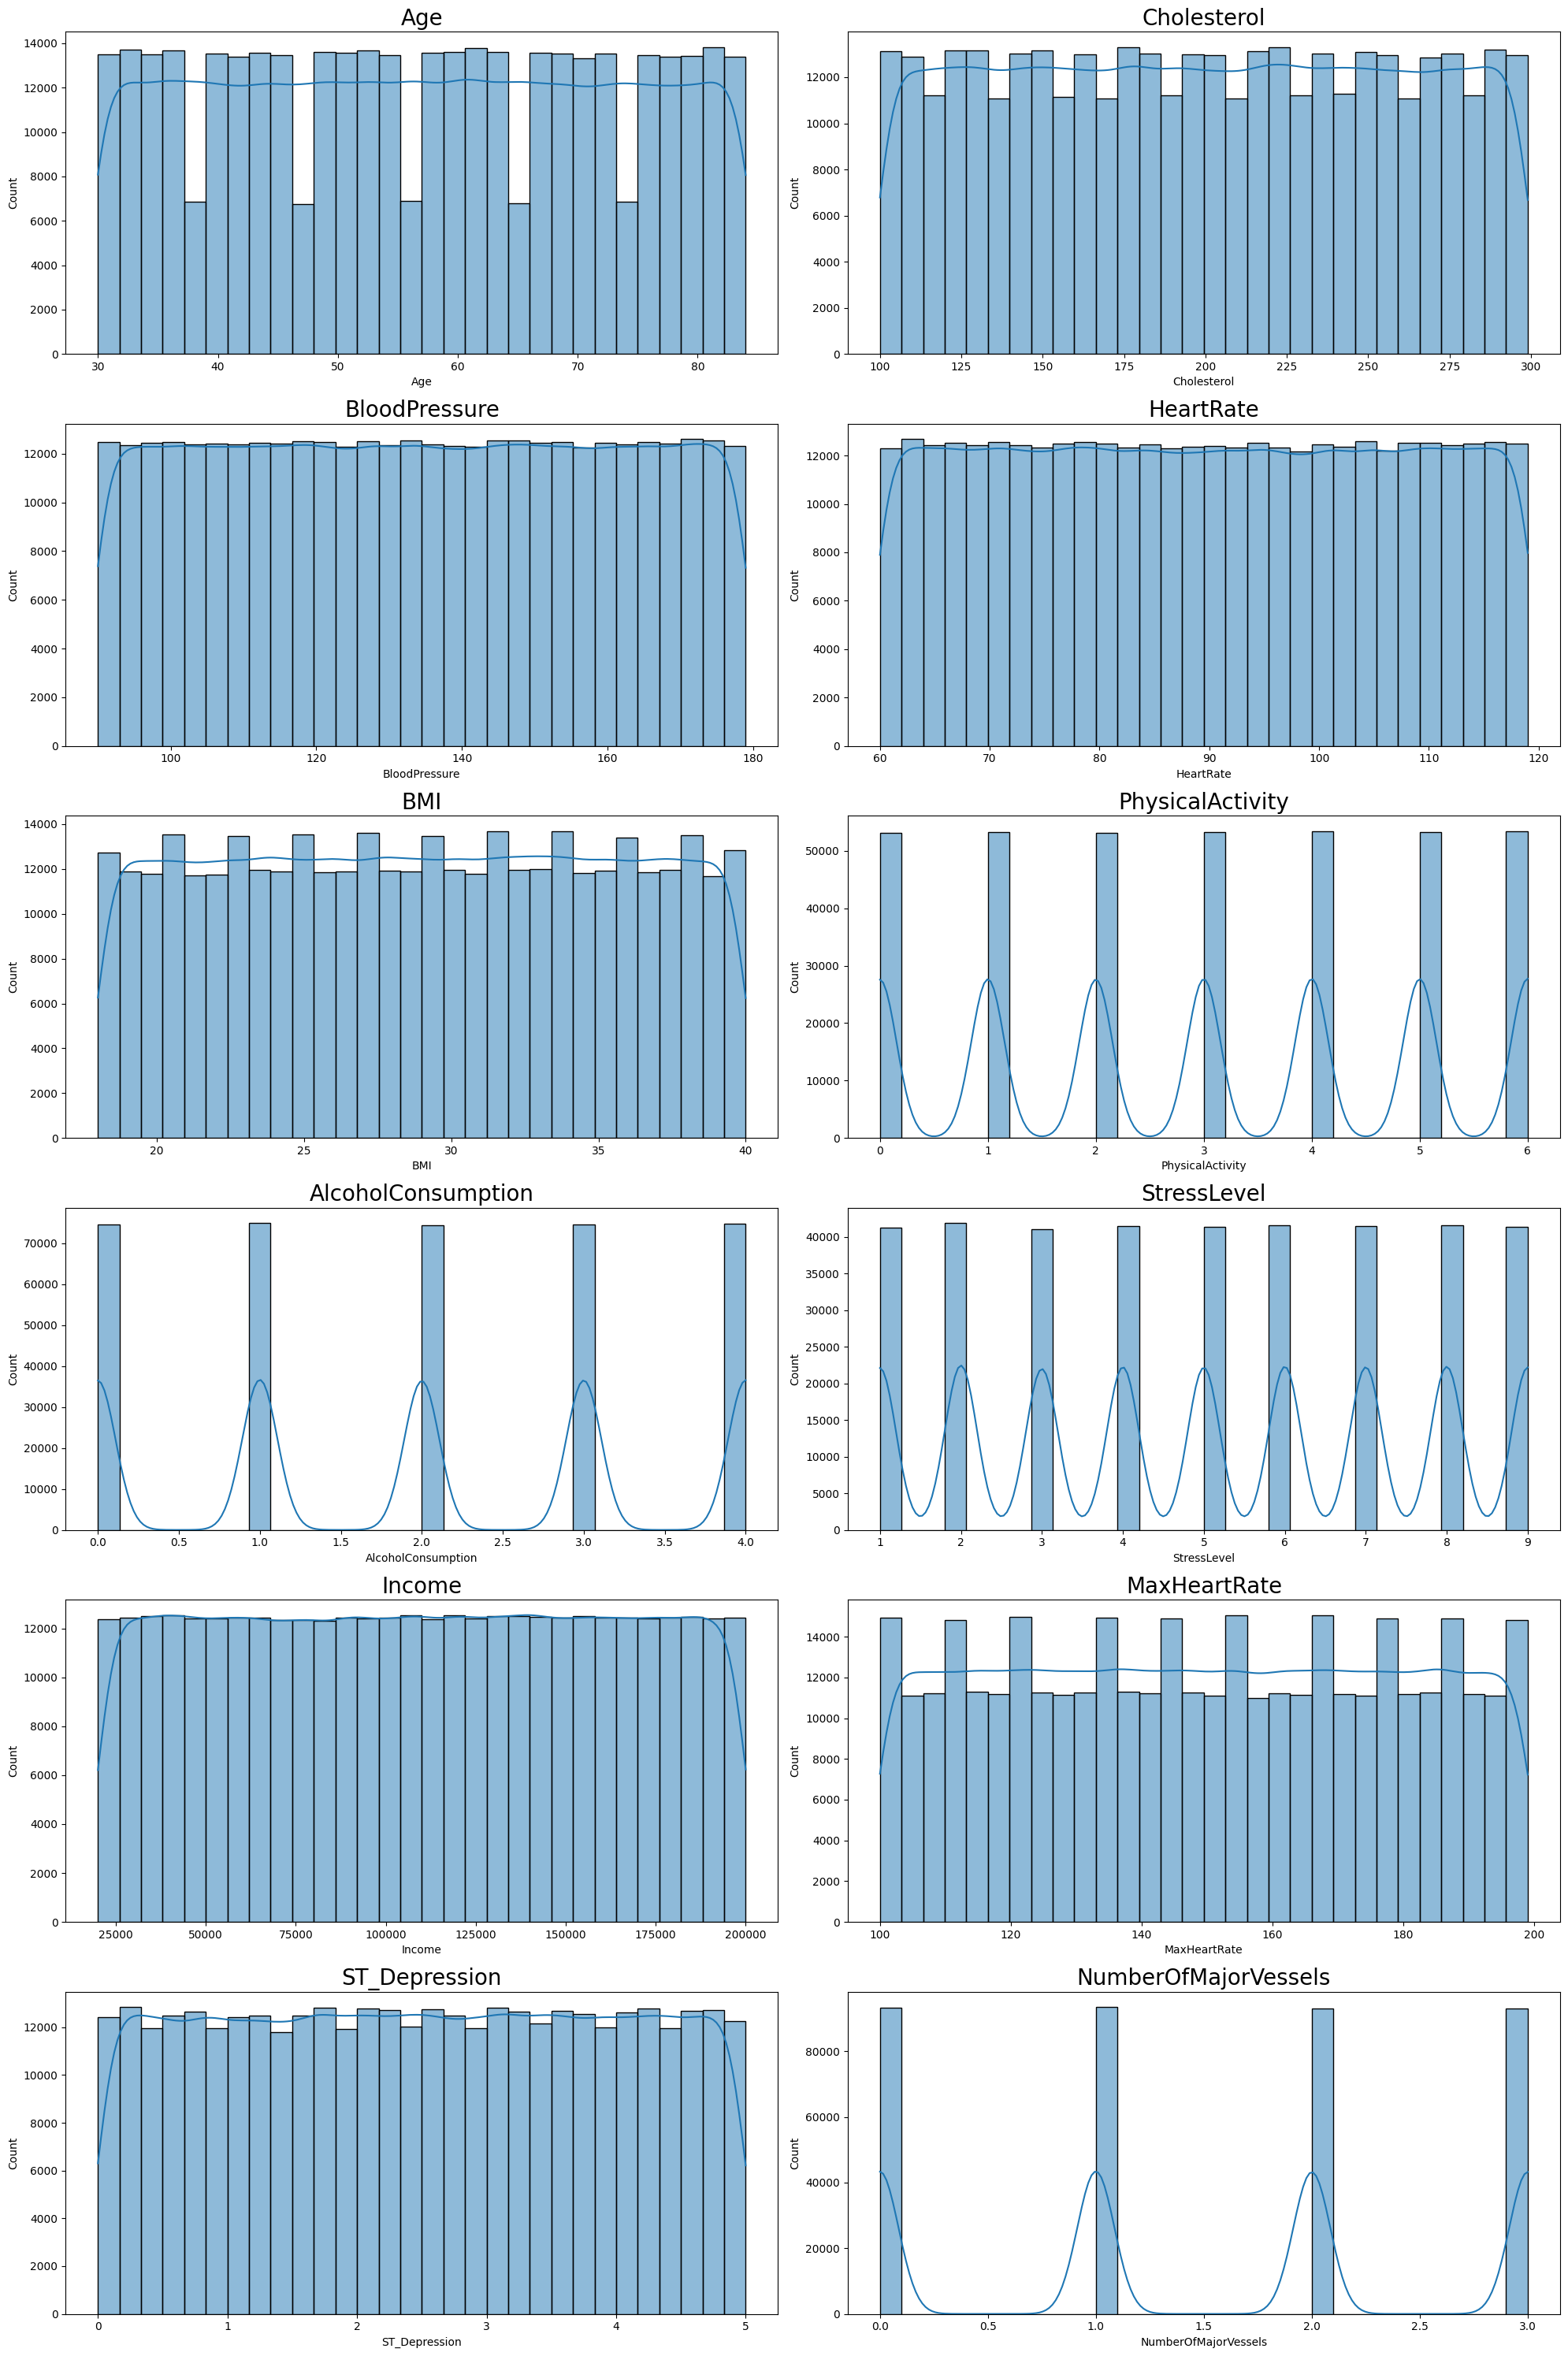

In [51]:
num_rows = (len(num_cols) + 1) // 2

f, ax = plt.subplots(6,2, figsize=(20,5 * num_rows))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data = df, x= cols, ax = ax[index],kde=True, bins=30)
    ax[index].set_title(cols, size = 20)
    
plt.tight_layout()
plt.show()

## **Boxplot**

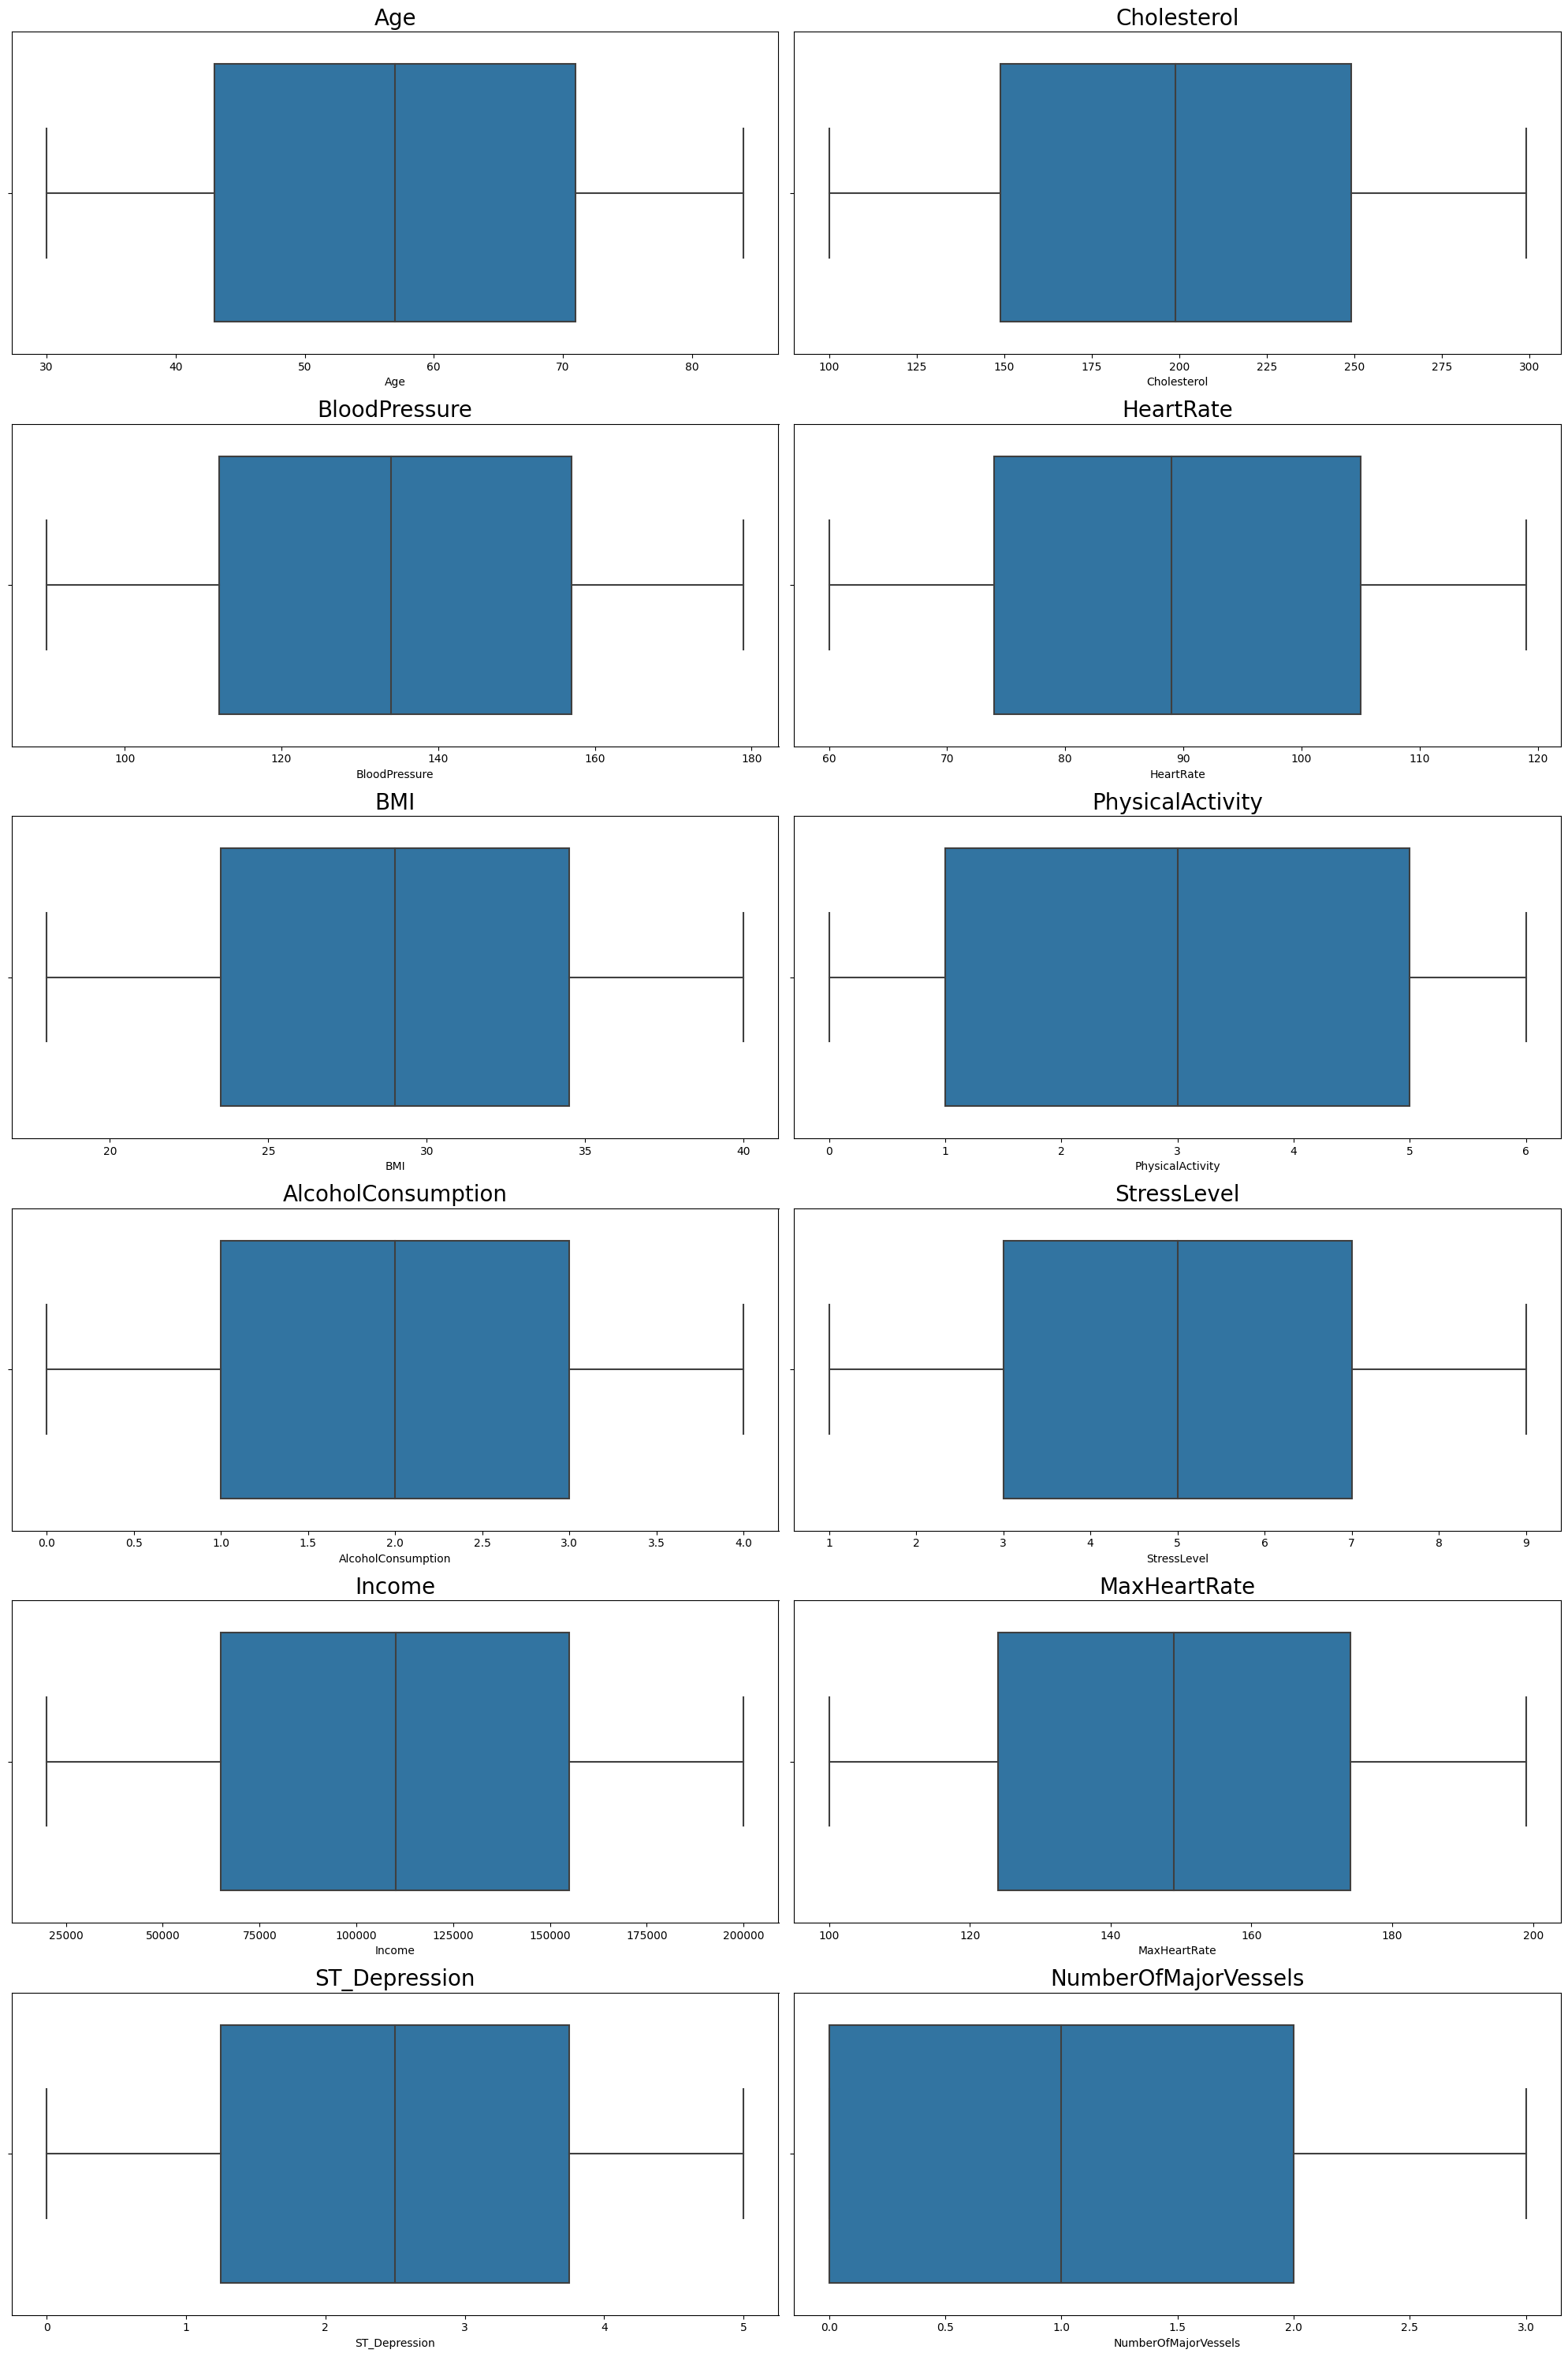

In [52]:
f, ax = plt.subplots(6,2, figsize=(20,5 * num_rows))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.boxplot(df, x= cols , ax= ax[index])
    ax[index].set_title(cols, size=20)

plt.tight_layout()
plt.show()

## **Count Plot**

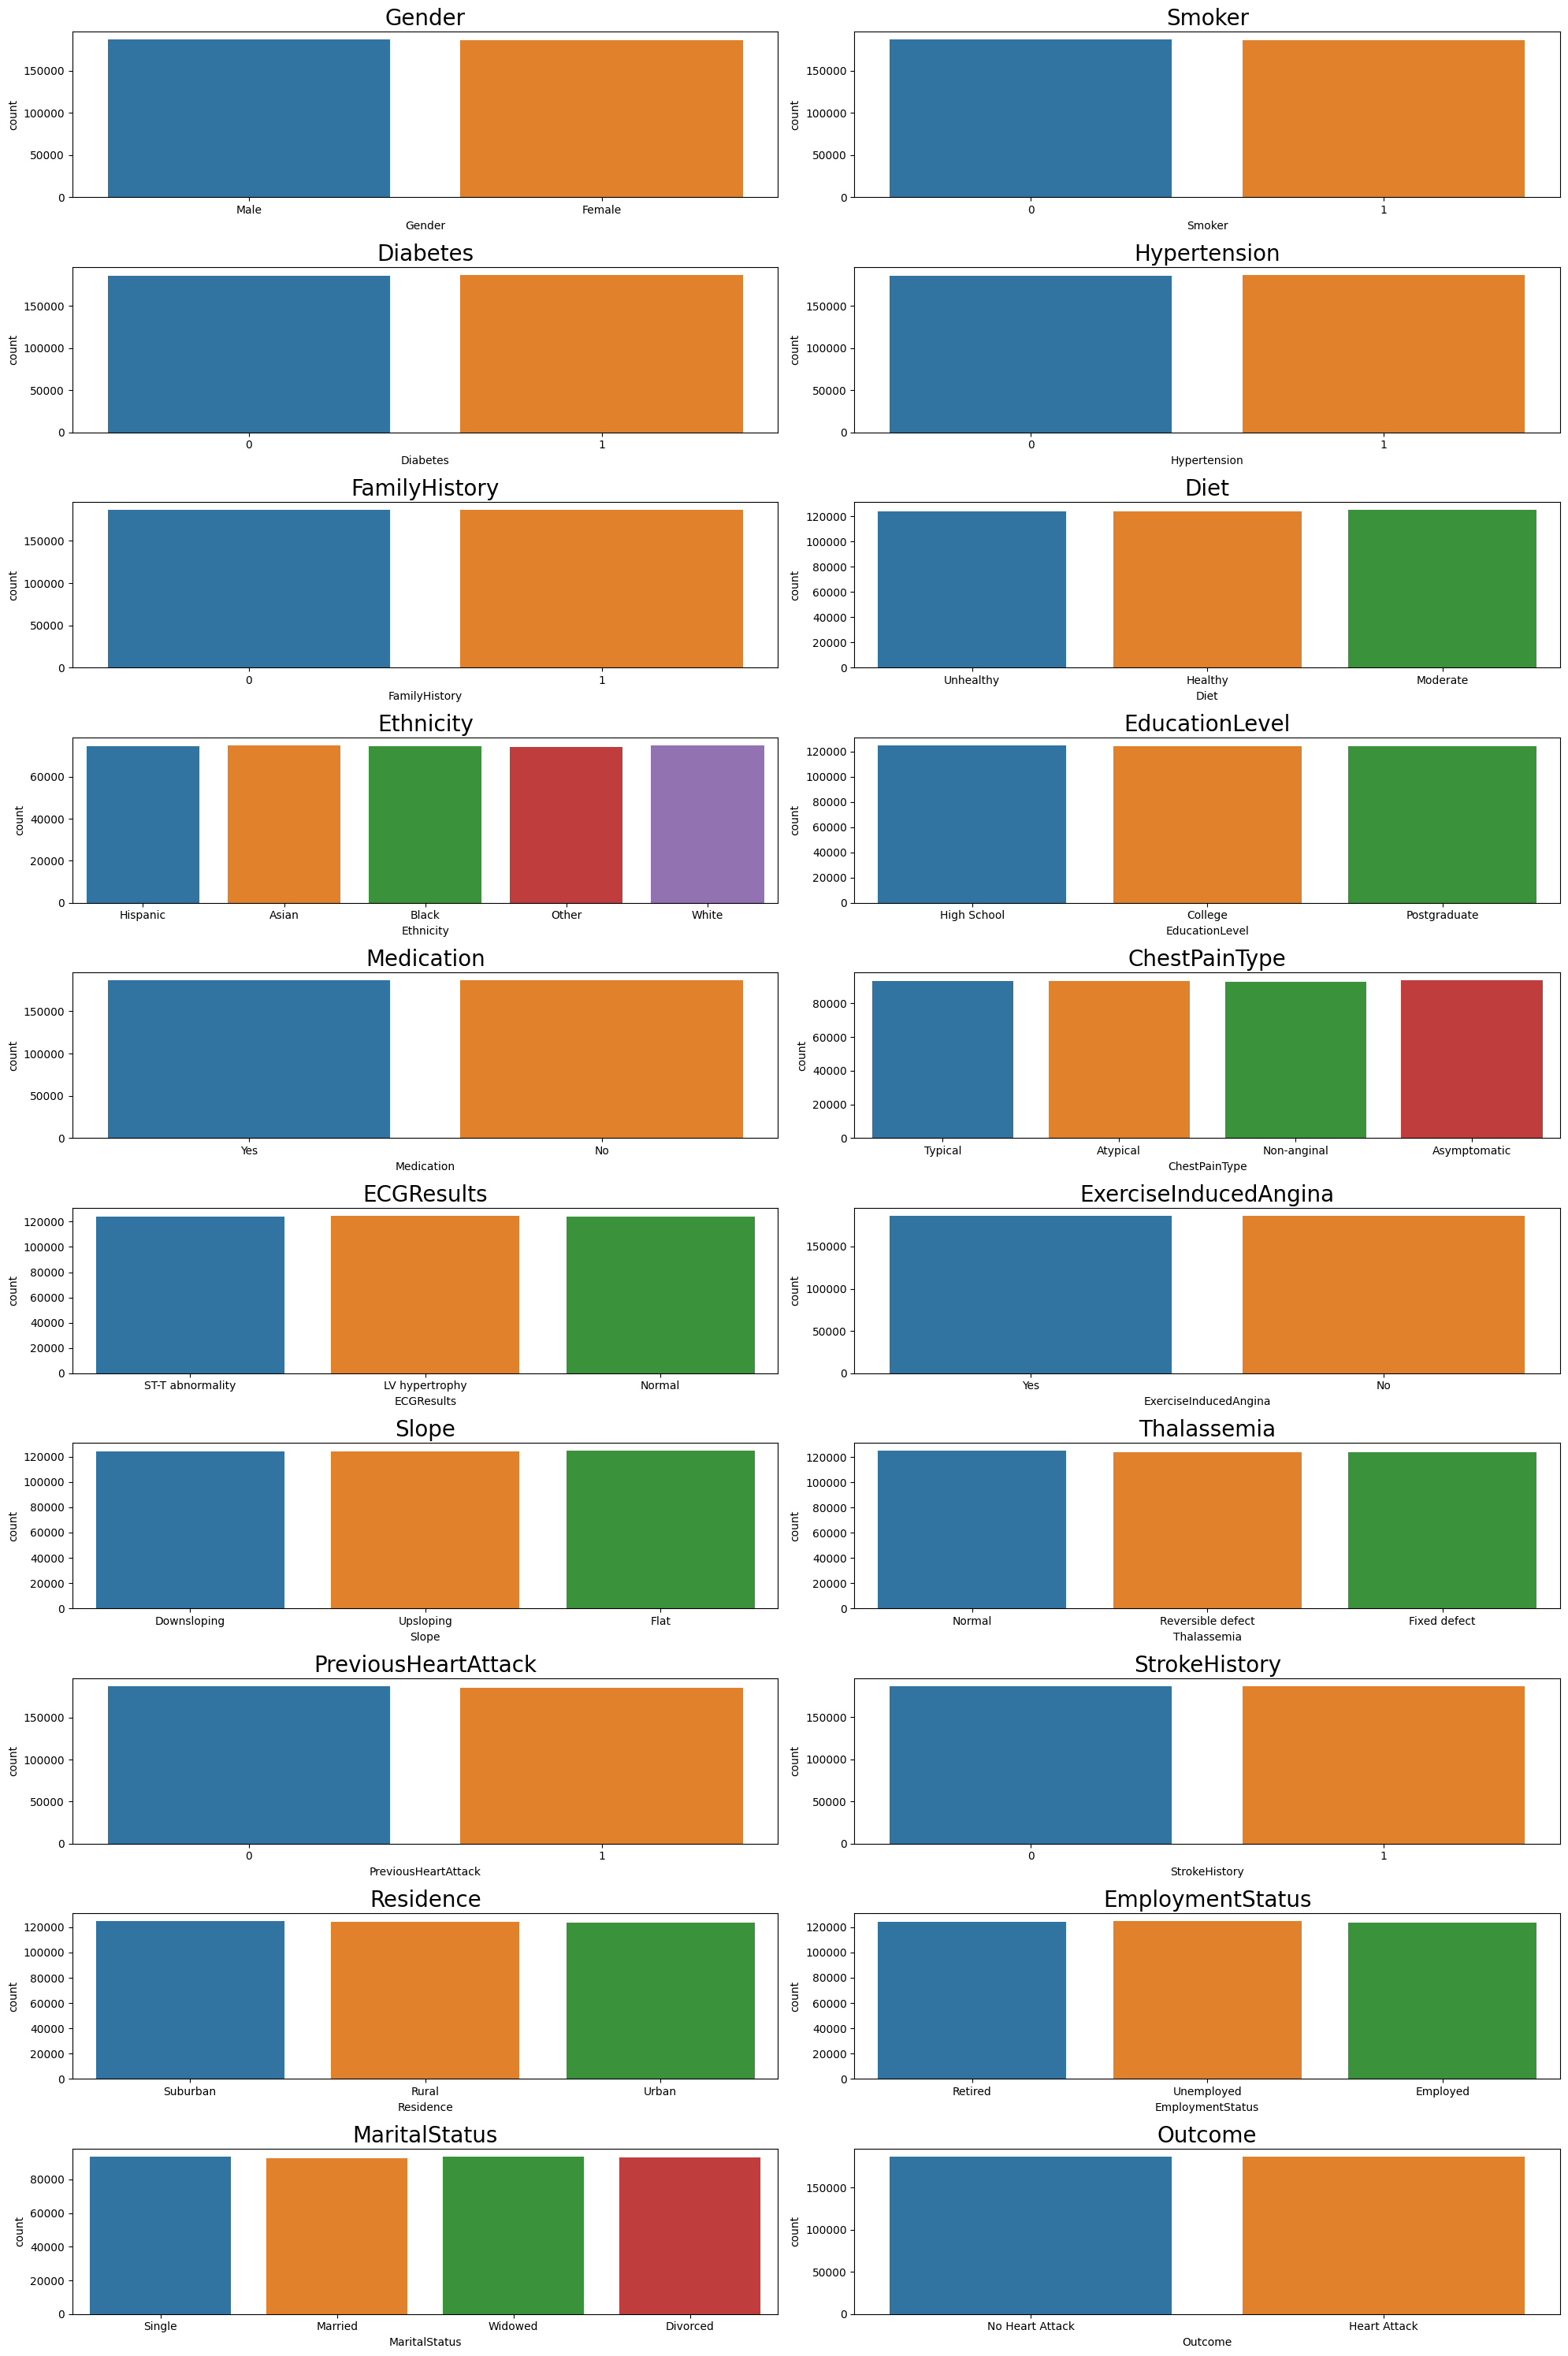

In [53]:
f, ax = plt.subplots(10,2, figsize=(20,5 * num_rows))
ax = ax.flatten()

for index, cols in enumerate(cat_cols):
    sns.countplot(df, x= cols , ax= ax[index])
    ax[index].set_title(cols, size=20)

plt.tight_layout()
plt.show()

## **Correlation**

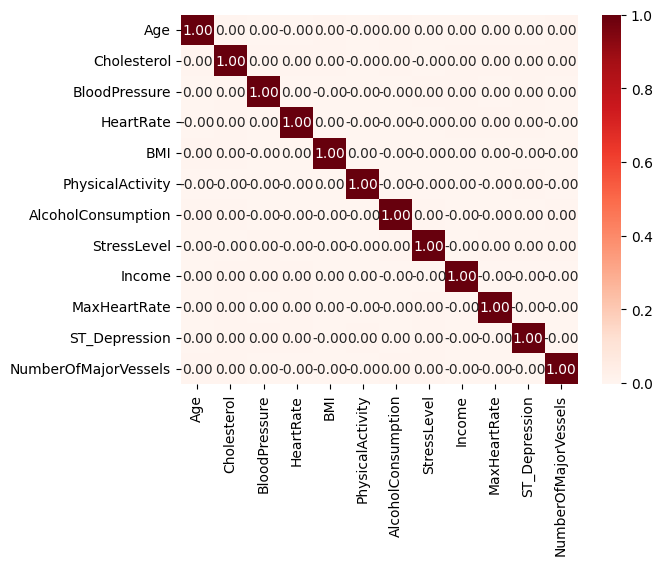

In [54]:
sns.heatmap(df[num_cols].corr(),annot=True, cmap='Reds',fmt= '.2f')
plt.show()

# **4. Modeling**

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score ,roc_auc_score

## **Preprocessing**

In [56]:
#cat_cols = df.select_dtypes(exclude = ['int64','float64']).columns

### **Label Encoding**

In [57]:
label_encoder = LabelEncoder()
label_mappings = {}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    label_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{label} -> {code}")
    print()

Column: Gender
Female -> 0
Male -> 1

Column: Smoker
0 -> 0
1 -> 1

Column: Diabetes
0 -> 0
1 -> 1

Column: Hypertension
0 -> 0
1 -> 1

Column: FamilyHistory
0 -> 0
1 -> 1

Column: Diet
Healthy -> 0
Moderate -> 1
Unhealthy -> 2

Column: Ethnicity
Asian -> 0
Black -> 1
Hispanic -> 2
Other -> 3
White -> 4

Column: EducationLevel
College -> 0
High School -> 1
Postgraduate -> 2

Column: Medication
No -> 0
Yes -> 1

Column: ChestPainType
Asymptomatic -> 0
Atypical -> 1
Non-anginal -> 2
Typical -> 3

Column: ECGResults
LV hypertrophy -> 0
Normal -> 1
ST-T abnormality -> 2

Column: ExerciseInducedAngina
No -> 0
Yes -> 1

Column: Slope
Downsloping -> 0
Flat -> 1
Upsloping -> 2

Column: Thalassemia
Fixed defect -> 0
Normal -> 1
Reversible defect -> 2

Column: PreviousHeartAttack
0 -> 0
1 -> 1

Column: StrokeHistory
0 -> 0
1 -> 1

Column: Residence
Rural -> 0
Suburban -> 1
Urban -> 2

Column: EmploymentStatus
Employed -> 0
Retired -> 1
Unemployed -> 2

Column: MaritalStatus
Divorced -> 0
Married

### **Train Test Split**

In [58]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [59]:
x_train, x_test, y_train, y_test =train_test_split(X, y , random_state = 42, test_size= 0.2)

## **ML**

In [60]:
lgr = LogisticRegression()
rfc = RandomForestClassifier(random_state=42)
abc = AdaBoostClassifier(random_state=42)
dct = DecisionTreeClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

models = [lgr, rfc, abc,dct, gbc, xgb]

names = ["LogisticRegression","Random Forest", "Ada Boost","DecisionTree",
        "Gradient Boostng", "XGBoost"]

LogisticRegression
accuracy: 0.5000469200348548
              precision    recall  f1-score   support

           0       0.50      0.54      0.52     37003
           1       0.50      0.46      0.48     37592

    accuracy                           0.50     74595
   macro avg       0.50      0.50      0.50     74595
weighted avg       0.50      0.50      0.50     74595



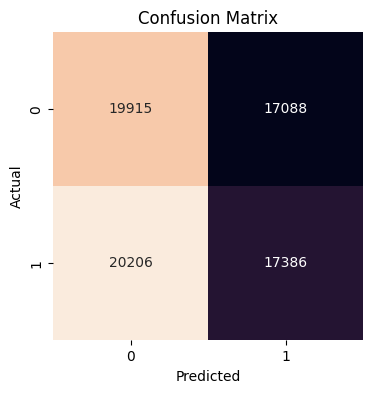

--------------------------------------------------
Random Forest
accuracy: 0.4962665057979757
              precision    recall  f1-score   support

           0       0.49      0.54      0.51     37003
           1       0.50      0.46      0.48     37592

    accuracy                           0.50     74595
   macro avg       0.50      0.50      0.50     74595
weighted avg       0.50      0.50      0.50     74595



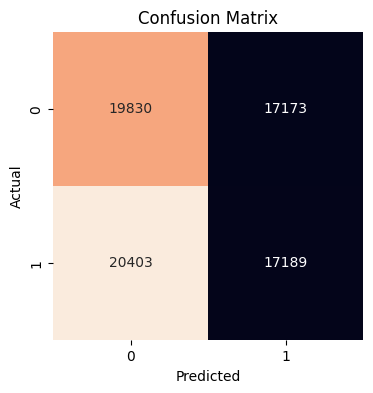

--------------------------------------------------
Ada Boost
accuracy: 0.49536832227361083
              precision    recall  f1-score   support

           0       0.49      0.49      0.49     37003
           1       0.50      0.50      0.50     37592

    accuracy                           0.50     74595
   macro avg       0.50      0.50      0.50     74595
weighted avg       0.50      0.50      0.50     74595



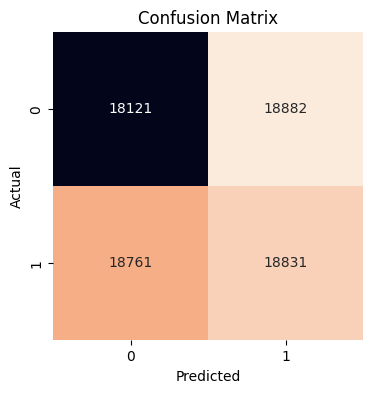

--------------------------------------------------
DecisionTree
accuracy: 0.49910851933775724
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     37003
           1       0.50      0.50      0.50     37592

    accuracy                           0.50     74595
   macro avg       0.50      0.50      0.50     74595
weighted avg       0.50      0.50      0.50     74595



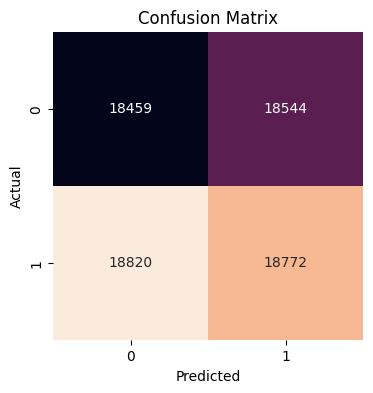

--------------------------------------------------
Gradient Boostng
accuracy: 0.49798243850124
              precision    recall  f1-score   support

           0       0.49      0.49      0.49     37003
           1       0.50      0.51      0.50     37592

    accuracy                           0.50     74595
   macro avg       0.50      0.50      0.50     74595
weighted avg       0.50      0.50      0.50     74595



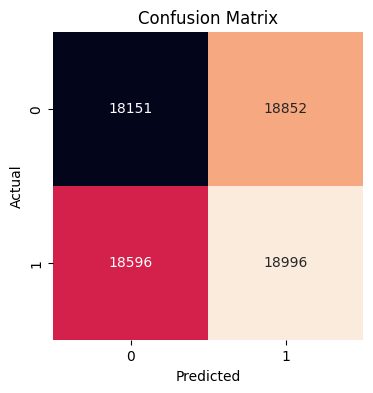

--------------------------------------------------
XGBoost
accuracy: 0.49965815403177155
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     37003
           1       0.50      0.50      0.50     37592

    accuracy                           0.50     74595
   macro avg       0.50      0.50      0.50     74595
weighted avg       0.50      0.50      0.50     74595



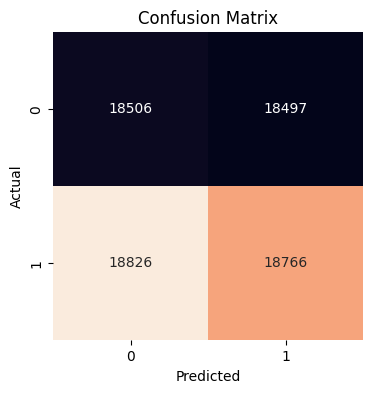

--------------------------------------------------


In [61]:
index = 0
ac = []

for name, model in enumerate(models):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    #pred = label_encoder.inverse_transform(pred)
    accuracy = accuracy_score(y_test, pred)
    ac.append(accuracy)
    cm = confusion_matrix(y_test, pred)
    
    print(f'{names[index]}')
    print(f'accuracy: {accuracy}')
    print(classification_report(y_test, pred))
    
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    print("-"*50)
    index += 1

## **Model Comparison**

In [62]:
acc_df = pd.DataFrame({'Model': names, 'Accuracy': ac})
acc_df['Accuracy'] = acc_df['Accuracy']*100
acc_df

,Model,Accuracy
0,LogisticRegression,50.004692
1,Random Forest,49.626651
2,Ada Boost,49.536832
3,DecisionTree,49.910852
4,Gradient Boostng,49.798244
5,XGBoost,49.965815


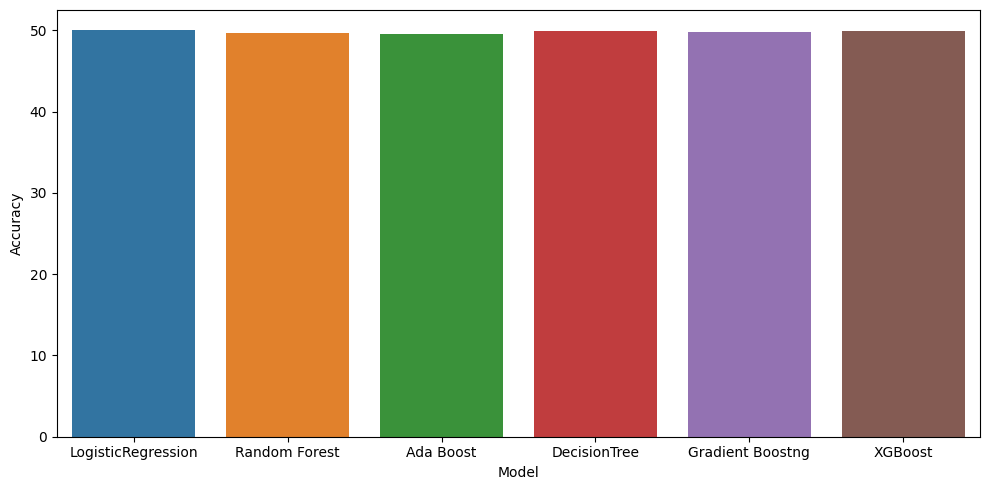

In [67]:
plt.subplots(figsize=(10,5))
sns.barplot(acc_df, x= 'Model', y = 'Accuracy')
plt.tight_layout()
plt.show() 

**The accuracy of all models is similar.**

## **Feature Importance**

In [69]:
#Select RF model

sorted_idx = (-rfc.feature_importances_).argsort()
list_of_tuples = list(zip(X.columns[sorted_idx],
                           rfc.feature_importances_[sorted_idx]))
feat_importance = pd.DataFrame(list_of_tuples,
                  columns=['feature','feature importance'])
feat_importance

,feature,feature importance
0,Income,0.078337
1,ST_Depression,0.075680
2,BMI,0.073186
3,Cholesterol,0.072682
4,MaxHeartRate,0.068183
5,BloodPressure,0.068177
6,HeartRate,0.064537
7,Age,0.064120
8,StressLevel,0.039105
9,PhysicalActivity,0.035279


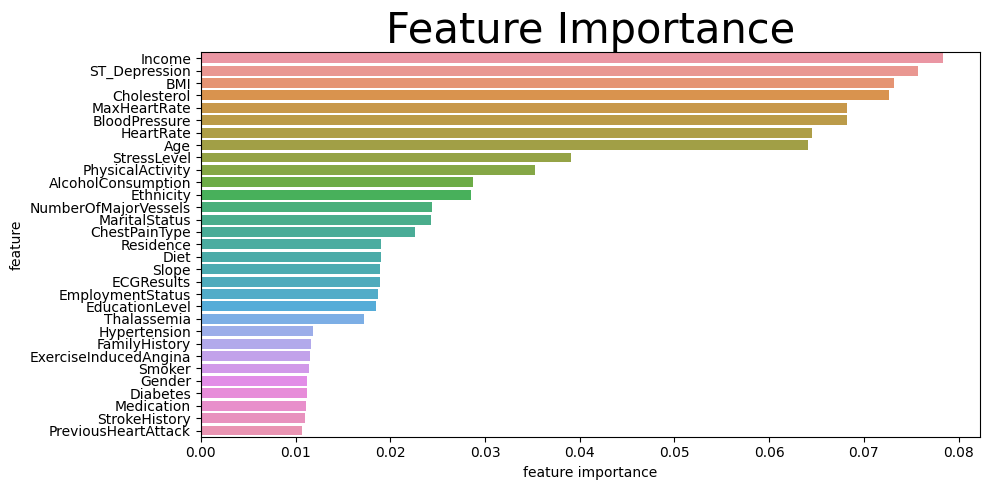

In [70]:
plt.figure(figsize=(10,5))
sns.barplot(feat_importance,y= 'feature',x='feature importance')

plt.title('Feature Importance',fontsize=30)
plt.tight_layout()
plt.show()

------

**Thankyou. Please leave your advice in the comments**